In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/characterrecognisation/TMNIST_Data.csv


**Abstract** 
The purpose of this notebook is to perform charecter recognition on TMINST (94 charecter) dataset. We used a simple CNN network to perform the charecter recognition. Overall it was observed that the accuracy is close to 99% which is pretty good for a simple 7 layer CNN.



**Importing Libraries and Fuctions**

In [2]:
import numpy as np 
import pandas as pd 
import re

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

import tensorflow as tf 
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

**Reading the Data**

In [3]:
# Reading Data
data = pd.read_csv('/kaggle/input/characterrecognisation/TMNIST_Data.csv')
data.head()

,names,labels,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,GrandHotel-Regular,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,EncodeSansCondensed-Medium,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Varela-Regular,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ArefRuqaa-Bold,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,KulimPark-Regular,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Spliting input and labels**

We will need this splitting in order to correctly label the predictions

In [6]:
# Grouping All labels
all_ = list(data['labels'].unique())

# Regex Pattern to check alphabets, digits and special symbols
pattern_uc = re.compile(r"[A-Z]")
pattern_lc = re.compile(r"[a-z]")
pattern_numbers = re.compile(r"[0-9]")
pattern_symbols = re.compile(r"[\W]|[\_\,]")

# Extracting Pattern
lower_case = pattern_lc.findall(str(all_))
Upper_case = pattern_uc.findall(str(all_))
Numbers_ = pattern_numbers.findall(str(all_))
Symbols_ = list(set(pattern_symbols.findall(str(all_))))
#ymbols_.pop(10)

# Creating Gropus
group = 1
for list_ in (lower_case,Upper_case,Numbers_,Symbols_):
    data.loc[data['labels'].isin(list_), 'group'] = str(group)
    group += 1

In [7]:
# defining X and y for training
X = data.iloc[:, 2:-1].astype('float32') 
y  = data[['labels']]

In [9]:
#preping the data to create dictionary
labels = y['labels'].unique()
values = [num for num in range(len(data['labels'].unique()))]
label_dict= dict(zip(labels,values)) 
#Creating Dictionary 
label_dict_inv = dict(zip(values,labels))

In [10]:
# Mapping
y['labels'].replace(label_dict, inplace=True) #Maping Values

In [11]:
#Checking the mappings
print(label_dict)

{2: 0, 8: 1, 4: 2, 3: 3, 1: 4, 6: 5, 5: 6, 9: 7, 7: 8, 0: 9}


**Creating Training and Test Sets**

In [12]:
# creating test train split of 80% and 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [13]:
# preping the inputs for training
Length, Height = 28,28
NCl = y_train.nunique()[0] # Unique targets

# N of images 28x28
X_train = np.reshape(X_train.values, (X_train.shape[0] ,Length, Height)) 
X_test = np.reshape(X_test.values, (X_test.shape[0] ,Length, Height))

# Target into Categorical Values
y_train = to_categorical(y_train, NCl, dtype='int' )
y_test = to_categorical(y_test, NCl, dtype='int' )

print(f'X:Train, Test data shape:{X_train.shape},{X_test.shape}')
print(f'Y:Train, Test data shape:{y_train.shape},{y_test.shape}')

X:Train, Test data shape:(23920, 28, 28),(5980, 28, 28)
Y:Train, Test data shape:(23920, 10),(5980, 10)


**Showing samples from the Dataset**

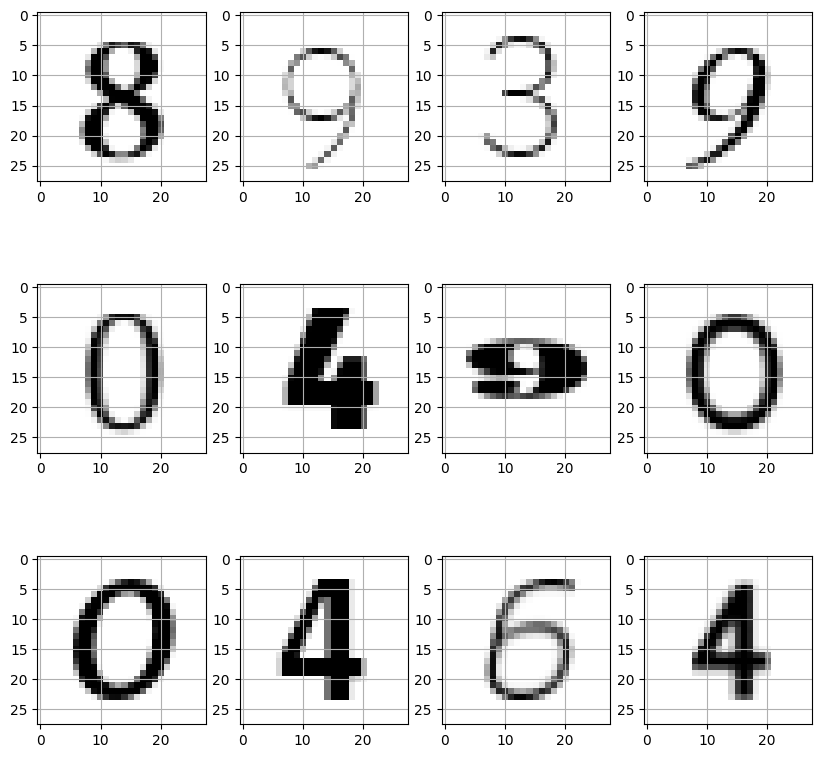

In [14]:
# displaying the charecters of our dataset
random = shuffle(X_train[:500]) #Randomly shuffle
fig,ax = plt.subplots(3,4 , figsize = (10,10)) 
axes = ax.flatten()
for i in range(12):
    img = np.reshape(random[i], (28,28)) # reshaping it for displaying
    axes[i].imshow(img, cmap="Greys")
    img_final =np.reshape(img, (1,28,28,1)) # reshapng it for passing into model for prediction
    axes[i].grid()

**Importing libraries for building Neural Networks**

1)Sequential: This is the Keras Sequential model API. It allows you to create models layer-by-layer in a step-by-step fashion. The layers are added sequentially, one on top of the other.

2)load_model: This function is used to load a pre-trained model from a file. If you have a saved model, you can load it using this function.

3)Dense: This is the standard fully connected layer in a neural network. It connects each neuron in one layer to every neuron in the next layer.

4)Conv2D: This layer is used for 2D convolutions, typically for processing image data. It is a key component in convolutional neural networks (CNNs).

5)MaxPool2D: This layer is used for max pooling operations on spatial data. It reduces the spatial dimensions of the input volume.

6)Flatten: This layer is used to flatten the input. It transforms the input into a one-dimensional array, which is then fed into a Dense layer.

7)Dropout: This layer is used for regularization. It randomly drops a proportion of input units during training to prevent overfitting.

8)BatchNormalization: This layer normalizes the activations of a neural network, improving stability and accelerating training.

9)SGD, Adam, RMSprop: These are different optimization algorithms that can be used during the training process. Stochastic Gradient Descent (SGD), Adam, and RMSprop are popular choices.

10)EarlyStopping: This callback stops training when a monitored metric has stopped improving. It helps prevent overfitting and allows you to save time during training.

In [15]:
# importing libraries for building neural netwrok
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D,Flatten,Dropout,BatchNormalization
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping

**Preping the input for CNN**

Certainly! A Convolutional Neural Network (CNN) is a type of neural network commonly used for image-related tasks.

In [16]:
RGB = 1  # In this case only one instead of 3 because we dont have Color images
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1],X_train.shape[2], RGB)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2],RGB)

#normalizing the image data
X_train = X_train/255
X_test = X_test/255
print(f'Train, Test shapes: {X_train.shape},{X_test.shape}')

Train, Test shapes: (23920, 28, 28, 1),(5980, 28, 28, 1)


**Building the CNN Architecture**

This architecture consists of:

Four convolutional blocks, each followed by BatchNormalization, ReLU activation, MaxPooling, and Dropout for regularization.

1)A Flatten layer to transition from convolutional to dense layers.

2)A Dense layer with BatchNormalization, ReLU activation, and Dropout.

3)The output layer with softmax activation for multi-class classification.

In [17]:
model = Sequential ()

# 4 Conv with Maxpool and Dropout [25%] -> Flatten - >  Dense -> Dense -> output 
model.add(Conv2D(filters = 32 , kernel_size = (3,3),input_shape = (Length, Height, RGB), padding = 'same',))
model.add(BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64 , kernel_size = (3,3) ,padding = 'same'))
model.add(BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 128 , kernel_size = (3,3) ,padding = 'same'))
model.add(BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 256 , kernel_size = (3,3) ,padding = 'same'))
model.add(BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(350))
model.add(BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(NCl, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 28, 28, 32)        128       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        1

In [19]:
#defining parameters for training
optimizer  = Adam(learning_rate=0.01)
callback =EarlyStopping(monitor='loss', patience=5)
Batch_ = 64
Epochs_ = 10

model.compile(loss = 'categorical_crossentropy', optimizer = optimizer, metrics = ['accuracy'])

1)Optimizer: We've chosen the Adam optimizer with a learning rate of 0.01. Adam is a popular optimization algorithm, and the learning rate we've chosen is reasonable. However, the optimal learning rate can vary depending on the dataset and model architecture. we might want to experiment with different learning rates to find the one that works best for your specific problem.

2)EarlyStopping Callback: we've included an EarlyStopping callback, which is a good practice. This callback monitors the training loss and stops training if the loss doesn't improve after a certain number of epochs (patience). In this case, it stops training if the loss doesn't improve for 5 consecutive epochs.

3)Batch Size: You've set the batch size to 64. Batch size determines the number of samples that are used in each iteration of training. Larger batch sizes can sometimes lead to faster training, but smaller batch sizes may offer better generalization. The optimal batch size can depend on the dataset and available computational resources.
Number of Epochs: You've set the number of epochs to 10. An epoch is one complete pass through the entire training dataset. 

The number of epochs depends on factors like the dataset size and complexity. It's often necessary to experiment with different numbers of epochs to find the right balance between underfitting and overfitting.
Categorical Crossentropy: You've chosen categorical crossentropy as the loss function. This is suitable for multi-class classification problems. Make sure your labels are one-hot encoded if you are using categorical crossentropy.


**Training the model**

In [20]:
#Training
history= model.fit(X_train,y_train, validation_data = (X_test,y_test),batch_size = Batch_ ,
                   epochs = Epochs_, verbose = 1)

Epoch 1/10
374/374 [==============================] - 44s 109ms/step - loss: 0.2107 - accuracy: 0.9340 - val_loss: 0.0823 - val_accuracy: 0.9779
Epoch 2/10
374/374 [==============================] - 41s 109ms/step - loss: 0.0745 - accuracy: 0.9780 - val_loss: 0.0469 - val_accuracy: 0.9865
Epoch 3/10
374/374 [==============================] - 42s 112ms/step - loss: 0.0614 - accuracy: 0.9817 - val_loss: 0.0347 - val_accuracy: 0.9893
Epoch 4/10
374/374 [==============================] - 41s 110ms/step - loss: 0.0522 - accuracy: 0.9846 - val_loss: 0.0478 - val_accuracy: 0.9846
Epoch 5/10
374/374 [==============================] - 41s 110ms/step - loss: 0.0503 - accuracy: 0.9855 - val_loss: 0.0556 - val_accuracy: 0.9804
Epoch 6/10
374/374 [==============================] - 42s 112ms/step - loss: 0.0467 - accuracy: 0.9860 - val_loss: 0.0318 - val_accuracy: 0.9918
Epoch 7/10
374/374 [==============================] - 41s 111ms/step - loss: 0.0454 - accuracy: 0.9865 - val_loss: 0.0256 - val_ac

In the context of training a neural network, an "epoch" refers to one complete pass through the entire training dataset. During one epoch, the neural network processes all training examples once, updating the model's weights and biases to improve its performance on the task at hand.

The training process is typically divided into a series of epochs. In each epoch, the model learns from the entire training dataset. The number of epochs is a hyperparameter that you set before training your model. Choosing the right number of epochs is important, as it affects the model's ability to generalize to new, unseen data.

Here's a brief overview of the training process in terms of epochs:

Start of Training: Initialize the neural network's parameters (weights and biases) randomly or using a pre-trained model.

Epoch 1: Feed the entire training dataset through the neural network. Calculate the loss, which measures the difference between the predicted outputs and the true labels. Use an optimization algorithm (e.g., stochastic gradient descent) to update the model's parameters to reduce the loss.

Epoch 2: Repeat the process with the entire training dataset. The model continues to learn patterns and improve its ability to make accurate predictions.

Final Epoch: After a predefined number of epochs (a hyperparameter you set), the training process concludes. The model's parameters are hopefully optimized to a point where it performs well not only on the training data but also on new, unseen data.

Choosing the right number of epochs involves finding a balance. Too few epochs may result in underfitting, where the model hasn't learned the underlying patterns in the data. Too many epochs can lead to overfitting, where the model becomes too specialized to the training data and performs poorly on new data. Common practices involve monitoring the model's performance on a separate validation dataset and stopping training when further epochs do not significantly improve validation performance (early stopping).

**Evaluating the model

In [21]:
#Evaluating model accuracy on test data
score = model.evaluate(X_test,y_test, batch_size = Batch_,verbose = 0)
print(f"Test Accuracy:{round(score[1],4)*100}%")

Test Accuracy:99.25%


Here we are getting accuracy of test cases 99.25% and hence its a great result.

**Visualizing the model performance**

In [22]:
# Function for Plotting
def Plott (data):
    fig, ax = plt.subplots(1,2 , figsize = (20,7))
    # summarize history for accuracy
    ax[0].plot(data.history['accuracy'])
    ax[0].plot(data.history['val_accuracy'])
    ax[0].set_title('model accuracy')
    ax[0].legend(['train', 'test'], loc='upper left')

    # summarize history for loss
    ax[1].plot(data.history['loss'], label =['loss'])
    ax[1].plot(data.history['val_loss'] ,label =['val_loss'])
    ax[1].set_title('model loss')
    ax[1].legend(['train', 'test'], loc='upper left')
    plt.show()

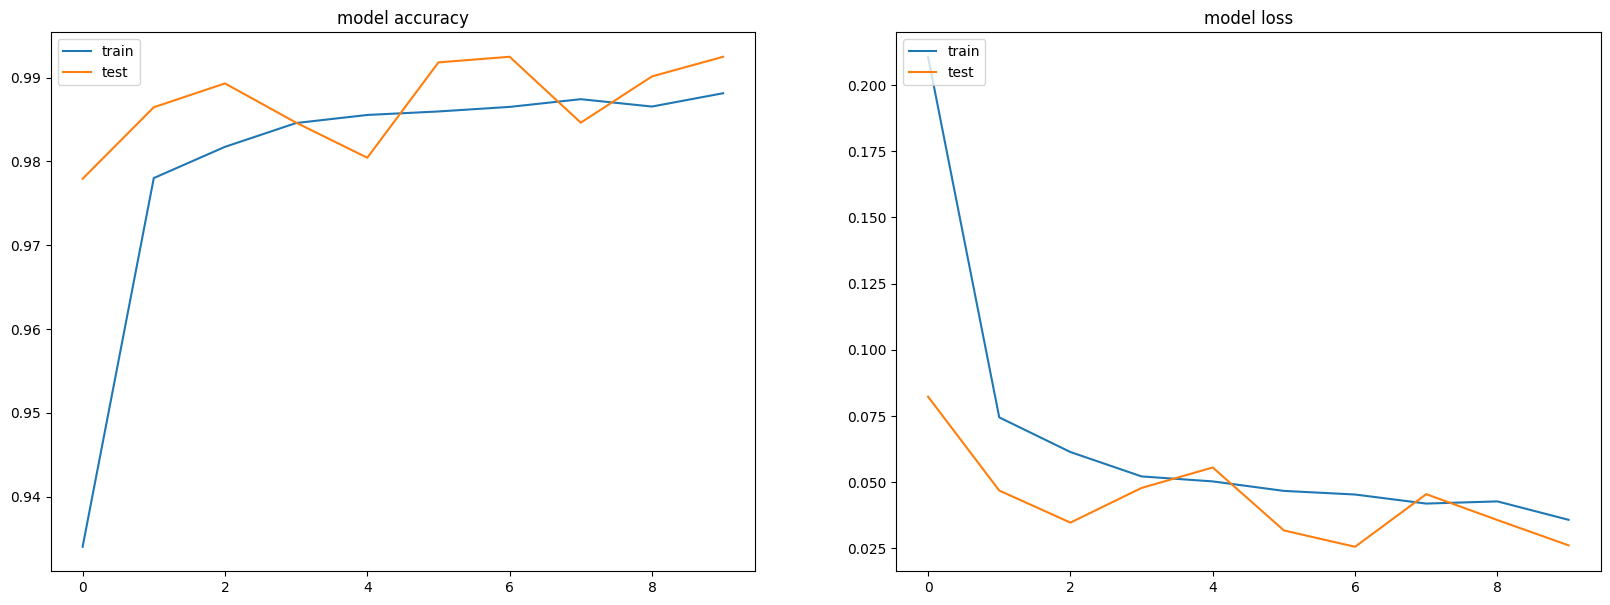

In [23]:
Plott(history)

**Making Final Predictions**

1/1 [==============================] - 0s 27ms/step


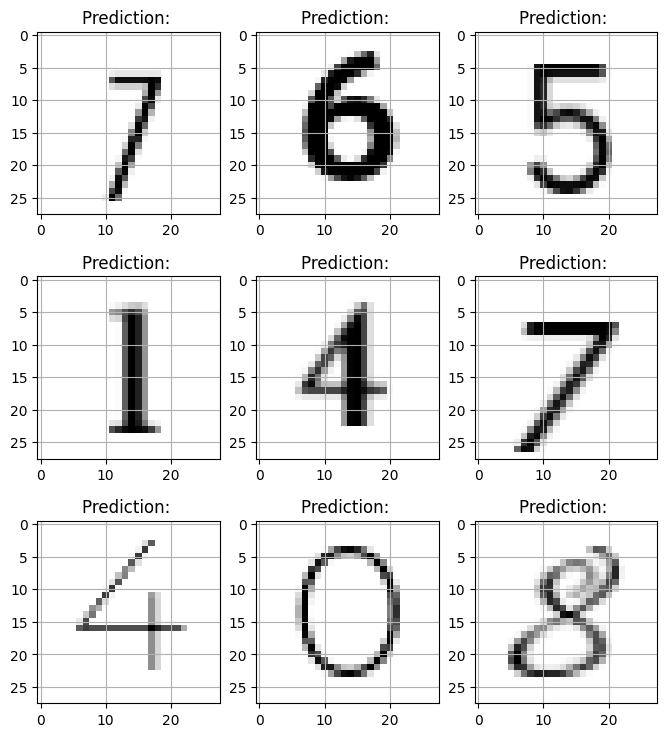

In [24]:
#predicting the charecters using trained model
fig, axes = plt.subplots(3,3, figsize=(8,9))
axes = axes.flatten()

for i,ax in enumerate(axes):
    img = np.reshape(X_test[i], (28,28)) # reshaping it for displaying
    ax.imshow(img, cmap="Greys")
    img_final =np.reshape(img, (1,28,28,1)) # reshapng it for passing into model for prediction
    pred = label_dict_inv[np.argmax(model.predict(img_final))]
    ax.set_title("Prediction: ")
    ax.grid()

In above we're visualizing predictions made by your trained model on a set of test images.

**Neural Network**
A neural network is a computational model inspired by the way biological neural networks in the human brain function. It is a key component of machine learning and artificial intelligence. Neural networks consist of interconnected nodes, or artificial neurons, organized into layers. The layers are typically divided into three types: input layer, hidden layers, and output layer.
Here's a brief overview of these components:

Input Layer: This layer receives the initial data or input features. Each node in the input layer represents a feature of the input data. 

Hidden Layers: These layers come between the input and output layers. Each node in a hidden layer takes input from the nodes in the previous layer, performs a mathematical operation, and passes the result to the next layer. Deep neural networks have multiple hidden layers, and these are responsible for learning complex representations from the input data. 

Output Layer: The final layer produces the network's output. The number of nodes in this layer depends on the task at hand. For example, in a binary classification task, there might be one node representing the probability of belonging to one class and another node representing the probability of belonging to the other class. The connections between nodes have weights, which the network learns during training. During training, the network is fed with labeled data, and it adjusts the weights to minimize the difference between its predictions and the actual labels. This process is known as backpropagation.

Neural networks have gained popularity due to their ability to learn and generalize from data, enabling them to perform tasks such as image and speech recognition, natural language processing, and more. Different types of neural networks, such as convolutional neural networks (CNNs) for image processing or recurrent neural networks (RNNs) for sequential data, are designed for specific tasks and data types.
Formula-

Z = Bias + W1X1 + W2X2 + …+ WnXn

where,
Z is the symbol for denotation of the above graphical representation of ANN. Wis, are the weights or the beta coefficients Xis, are the independent variables or the inputs, and Bias or intercept = W0
Steps to perform Neural Network There are three steps to perform in any neural network:

1)We take the input variables and the above linear combination equation of Z = W0 + W1X1 + W2X2 + …+ WnXn to compute the output or the predicted Y values, called the Ypred. 

2)Calculate the loss or the error term. The error term is the deviation of the actual values from the predicted values. Minimize the loss function or the error term.

Calculate Output for Neural Network Firstly, we will understand how to calculate the output for a neural network and then will see the approaches that can help to converge to the optimum solution of the minimum error term.
The output layer nodes are dependent on their immediately preceding hidden layer L3, which is coming from the hidden layer 2 and those nodes are further derived from the input variables. These middle hidden layers create the features that the network automatically creates and we don’t have to explicitly derive those features. In this manner, the features are generated in Deep Learning models and this is what makes them stand out from Machine Learning.

So, to compute the output, we will have to calculate for all the nodes in the previous layers. Let us understand what is the mathematical explanation behind any kind of neural nets.
Now, as from the above architecture, we can see that each neuron cannot have the same general equation for the output as the above one. We will have one such equation per neuron both for the hidden and the output layer.
The nodes in the hidden layer L2 are dependent on the Xs present in the input layer therefore, the equation will be the following:

N1 = W11X1 + W12X2 + W13X3 + W14X4 + W10 
N2 = W21X1+ W22X2 + W23X3 + W24X4 + W20 
N3 = W31X1+ W32X2 + W33X3 + W34X4 + W30 
N4 = W41X1+ W42X2 + W43X3 + W44X4 + W40 
N5 = W51X1+ W52X2 + W53X3 + W54X4 + W50 
Similarly, the nodes in the hidden layer L3 are derived from the neurons in the previous hidden layer L2, hence their respective equations will be:

N5 = W51 * N1 + W52 * N2 + W53 * N3 + W54 * N4 + W55 * N5 + W50 N6 = W61 * N1 + W62 * N2 + W63 * N3 + W64 * N4 + W65 * N5 + W60 N7 = W71 * N1 + W72 * N2 + W73 * N3 + W74 * N4 + W75 * N5 + W70 The output layer nodes are coming from the hidden layer L3 which makes the equations as:
O1 = WO11 * N5 + WO12 * N6 + WO13 * N7 + WO10 O2 = WO21 * N5 + WO22 * N6 + WO23 * N7 + WO20.


**Conclusion**
The model performed good and was able to predict with 100% accuracy (9 out of 9 predictions are correct)
The accuracy on test test is 99.5% which is pretty decent for a simple CNN

**References**

https://www.turing.com/kb/mathematical-formulation-of-feed-forward-neural-network
https://towardsdatascience.com/feed-forward-neural-networks-how-to-successfully-build-them-in-python-74503409d99a
https://pyimagesearch.com/2021/05/06/implementing-feedforward-neural-networks-with-keras-and-tensorflow/
https://www.kaggle.com/code/swamita/building-cnns-from-scratch-in-pytorch
https://www.kaggle.com/code/sheshngupta/tminst-character-recognition-94-4-accuracy
https://www.kaggle.com/datasets/nimishmagre/tmnist-typeface-mnist/code?select=TMNIST_Data.csv

**License**

MIT License

Copyright (c) 2023 Sanat Popli

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.